In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Símbolo de cotización de la empresa que deseas consultar (por ejemplo, Apple)
empresa = 'AAPL'

# Crear un objeto Ticker para la empresa
ticker = yf.Ticker(empresa)

# Obtener el último dividendo anualizado (suponiendo que es el último dividendo multiplicado por la frecuencia)
# Esto es una simplificación y puede no ser cierto si la compañía cambió su dividendo recientemente
ultimo_dividendo = ticker.dividends[-1] * 4  # Suponiendo que los dividendos se pagan trimestralmente

# Obtener el precio actual de las acciones
precio_actual = ticker.history(period="1d")['Close'].iloc[0]

# Calcular el Dividend Yield en porcentaje
dividend_yield = (ultimo_dividendo / precio_actual) * 100

print(f"Dividendo Anualizado: {ultimo_dividendo:.2f}")
print(f"Precio Actual: {precio_actual:.2f}")
print(f"Dividend Yield: {dividend_yield:.2f}%")



Dividendo Anualizado: 0.88
Precio Actual: 181.82
Dividend Yield: 0.48%


In [3]:
# Definir el ticker para Apple (AAPL)
ticker = 'AAPL'

treasury_rate = yf.download("^IRX", period="1d", progress=False)['Close'].iloc[-1]

def get_stock_data(ticker):
    # Download historical data for the given ticker
    data = yf.download(ticker, period="1d", progress=False)
    
    # Get the current price (the most recent "Close" value)
    current_price = data["Close"].iloc[-1]
    return current_price

current_price = get_stock_data(ticker)

# Crear el objeto ticker
ticker_data = yf.Ticker(ticker)

# Obtener las fechas de vencimiento de las opciones
options_expirations = ticker_data.options

# Seleccionar la fecha de vencimiento deseada
expiration_date = options_expirations[0]

# Obtener las opciones de llamada (call) para la fecha de vencimiento seleccionada
options_chain = ticker_data.option_chain(expiration_date)
calls = options_chain.calls
puts = options_chain.puts

# Agregar la columna de 'Maturity' al DataFrame
calls['Maturity'] = expiration_date
puts['Maturity'] = expiration_date
calls['Spot'] = current_price
puts['Spot'] = current_price
calls['RiskFree'] = treasury_rate
puts['RiskFree'] = treasury_rate
calls['TTM'] = treasury_rate
puts['RiskFree'] = treasury_rate

# Muestra las primeras filas de las opciones de llamada con la columna 'Maturity'
puts.shape

(49, 17)

In [7]:
options_expirations

('2023-11-10',
 '2023-11-17',
 '2023-11-24',
 '2023-12-01',
 '2023-12-08',
 '2023-12-15',
 '2023-12-22',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16')

In [10]:
for expiration in options_expirations:
    yf.

2023-11-10
2023-11-17
2023-11-24
2023-12-01
2023-12-08
2023-12-15
2023-12-22
2024-01-19
2024-02-16
2024-03-15
2024-04-19
2024-06-21
2024-09-20
2024-12-20
2025-01-17
2025-06-20
2025-09-19
2025-12-19
2026-01-16


<Axes: xlabel='strike'>

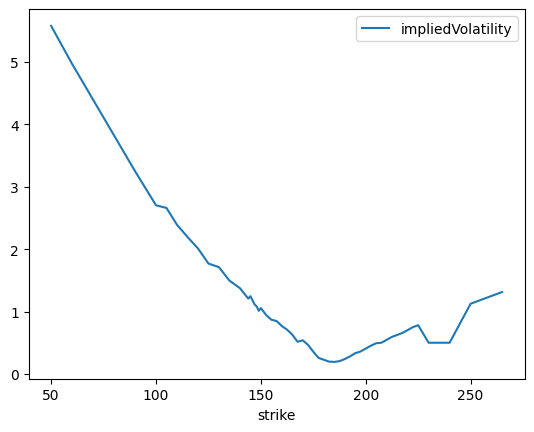

In [5]:
calls.plot(x='strike',y='impliedVolatility')

In [8]:
import pandas as pd
import yfinance as yf

# Definir el ticker para Apple (AAPL)
ticker = 'AAPL'

# Descargar la tasa del tesoro para usar como la tasa libre de riesgo
treasury_rate = yf.download("^IRX", period="1d", progress=False)['Close'].iloc[-1]

# Inicializar DataFrames vacíos para calls y puts
all_calls = pd.DataFrame()
all_puts = pd.DataFrame()

# Crear el objeto ticker
ticker_data = yf.Ticker(ticker)

# Obtener las fechas de vencimiento de las opciones
options_expirations = ticker_data.options

# Función para obtener el precio actual de la acción
def get_stock_data(ticker):
    data = yf.download(ticker, period="1d", progress=False)
    current_price = data["Close"].iloc[-1]
    return current_price

# Obtener el precio actual de la acción
current_price = get_stock_data(ticker)

# Bucle a través de cada fecha de vencimiento de las opciones
for expiration_date in options_expirations:
    # Obtener las opciones de llamada (call) y puesta (put) para la fecha de vencimiento seleccionada
    options_chain = ticker_data.option_chain(expiration_date)
    calls = options_chain.calls
    puts = options_chain.puts

    # Agregar columnas de 'Maturity', 'Spot', 'RiskFree', y 'TTM'
    calls['Maturity'] = expiration_date
    puts['Maturity'] = expiration_date
    calls['Spot'] = current_price
    puts['Spot'] = current_price
    calls['RiskFree'] = treasury_rate
    puts['RiskFree'] = treasury_rate
    # Suponiendo que quieres calcular el TTM de alguna manera, por ejemplo en días
    calls['TTM'] = (pd.to_datetime(expiration_date) - pd.Timestamp.today()).days
    puts['TTM'] = (pd.to_datetime(expiration_date) - pd.Timestamp.today()).days

    # Concatenar a los DataFrames acumulativos
    all_calls = pd.concat([all_calls, calls], ignore_index=True)
    all_puts = pd.concat([all_puts, puts], ignore_index=True)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
all_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Maturity,Spot,RiskFree,TTM
0,AAPL231110C00050000,2023-10-25 14:10:09+00:00,50.0,121.90,129.10,129.55,0.00,0.000000,1.0,11,4.882816,True,REGULAR,USD,2023-11-10,179.229996,5.26,3
1,AAPL231110C00060000,2023-10-26 14:01:29+00:00,60.0,109.94,119.15,119.55,0.00,0.000000,1.0,0,4.328130,True,REGULAR,USD,2023-11-10,179.229996,5.26,3
2,AAPL231110C00090000,2023-11-03 14:13:05+00:00,90.0,88.10,89.15,89.55,3.25,3.830289,3.0,3,2.812503,True,REGULAR,USD,2023-11-10,179.229996,5.26,3
3,AAPL231110C00100000,2023-11-02 18:57:26+00:00,100.0,77.47,79.15,79.60,0.00,0.000000,7.0,12,2.476566,True,REGULAR,USD,2023-11-10,179.229996,5.26,3
4,AAPL231110C00105000,2023-10-30 17:29:00+00:00,105.0,65.10,74.15,74.60,0.00,0.000000,1.0,4,2.285161,True,REGULAR,USD,2023-11-10,179.229996,5.26,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,AAPL260116C00280000,2023-11-06 19:18:04+00:00,280.0,4.67,4.65,4.90,0.32,7.356326,2.0,63,0.255104,False,REGULAR,USD,2026-01-16,179.229996,5.26,801
841,AAPL260116C00285000,2023-11-06 19:18:04+00:00,285.0,4.20,4.15,4.40,0.40,10.526312,2.0,24,0.253639,False,REGULAR,USD,2026-01-16,179.229996,5.26,801
842,AAPL260116C00290000,2023-11-06 19:18:04+00:00,290.0,3.78,3.70,3.95,0.38,11.176467,2.0,83,0.252296,False,REGULAR,USD,2026-01-16,179.229996,5.26,801
843,AAPL260116C00300000,2023-11-06 20:28:39+00:00,300.0,3.08,3.00,3.25,0.28,9.999999,11.0,4594,0.251228,False,REGULAR,USD,2026-01-16,179.229996,5.26,801


In [ ]:
all_puts.shape

(796, 18)

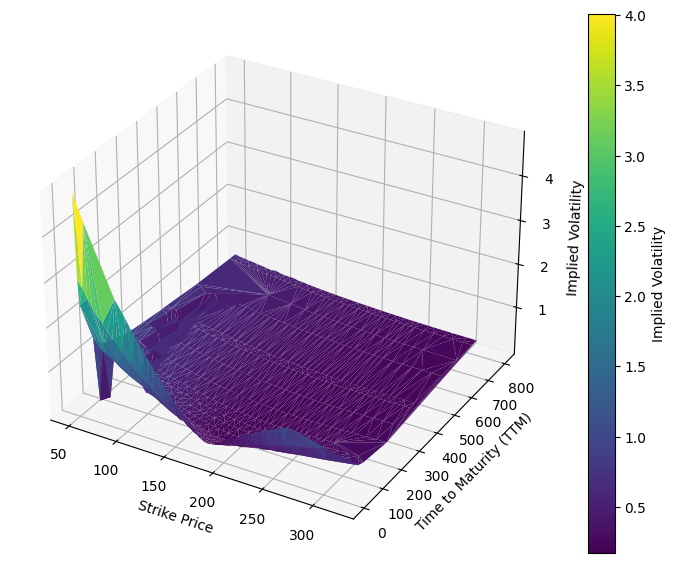

In [ ]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Trazar los datos como un gráfico de superficie
# Usando 'plot_trisurf' para crear una superficie triangulada
tri_surf = ax.plot_trisurf(all_calls['strike'], all_calls['TTM'], all_calls['impliedVolatility'], cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Maturity (TTM)')
ax.set_zlabel('Implied Volatility')

# Leyenda para la barra de color que representa la volatilidad implícita
cbar = plt.colorbar(tri_surf)
cbar.set_label('Implied Volatility')

# Mostrar el gráfico
plt.show()


In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


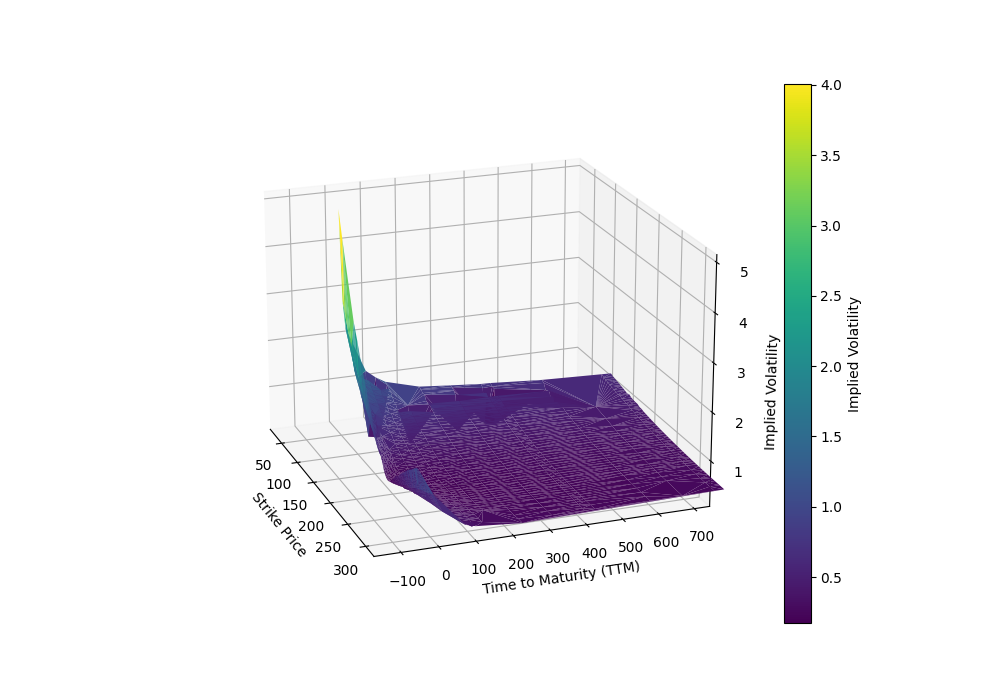

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Trazar los datos como un gráfico de superficie
tri_surf = ax.plot_trisurf(all_calls['strike'], all_calls['TTM'], all_calls['impliedVolatility'], cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Maturity (TTM)')
ax.set_zlabel('Implied Volatility')

# Leyenda para la barra de color que representa la volatilidad implícita
cbar = plt.colorbar(tri_surf)
cbar.set_label('Implied Volatility')

# Mostrar el gráfico
plt.show()